# Diamond Price Prediction
Information About the Data :
- The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

- id : unique identifier of each diamond
- carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- cut : Quality of Diamond Cut
- color : Color of Diamond
- clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
- depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
- table : A diamond's table is the facet which can be seen when the stone is viewed face up.
- x : Diamond X dimension
- y : Diamond Y dimension
- x : Diamond Z dimension
- Target variable:

price: Price of the given Diamond.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("./data/gemstone.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
# Check Dataset Information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
# Check Statistical Summary 

df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
# Check Null values 

df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

- NO null values in the dataset .

In [8]:
# Check Duplicate Records 

df.duplicated().sum()

0

- NO Duplicate Values . 

In [10]:
# Check Dataset Shape 

df.shape

(193573, 11)

In [11]:
# Drop id column 

df = df.drop(['id'] ,axis=1)

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [14]:
# Divide Numerical and categorical columns 

numerical_cols = df.columns[df.dtypes != 'object']
categorical_cols = df.columns[df.dtypes == 'object']
print("Numerical columns:",numerical_cols)
print('Categorical Columns:',categorical_cols)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [15]:
df[categorical_cols].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


- So in this dataset in Total 5 cut , 7 color and 8 clarity available . and in that G color is most frequent . and SI1 clarity is most time occured. 

In [16]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

<Axes: >

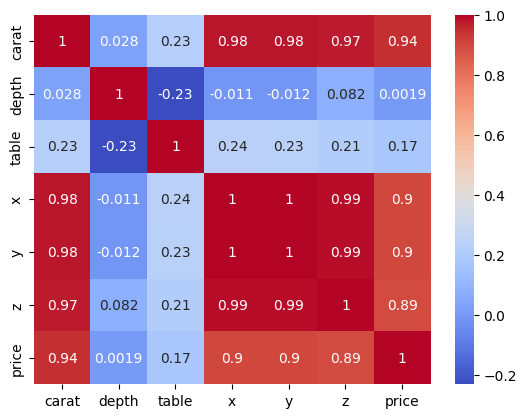

In [24]:
# Check correlation of numerical cols 

sns.heatmap(df[numerical_cols].corr() , annot=True , cmap='coolwarm' )

-  Here carat , x , y , z is highly correlated with price . and depth and table is less correlted but we can use in training time . 

**Convert Categorical columns values into numerical data**

In [25]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [26]:
df['cut'] = df['cut'].map({"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5})
df['clarity'] = df['clarity'].map({"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8})
df['color'] = df['color'].map({"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7})

In [27]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [28]:
# Convert Data into dependent and independent variable 

X = df.drop('price' , axis= 1 )
y = df['price']

In [29]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81


In [30]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [31]:
# Split data into train and test part 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [32]:
X_train.shape , X_test.shape

((135501, 9), (58072, 9))

In [33]:
y_train.shape , y_test.shape

((135501,), (58072,))

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[-0.82314374,  0.87410007, -0.93674681, ..., -0.78045073,
        -0.83510329, -0.87602377],
       [ 0.94502267, -1.13764403,  0.91085333, ...,  1.07322572,
         1.16638856,  0.94663261],
       [ 1.9584839 , -0.13177198,  0.91085333, ...,  1.70311578,
         1.75506264,  1.74223659],
       ...,
       [ 0.92345966, -0.13177198,  0.29498662, ...,  0.99223986,
         0.92186241,  1.0478913 ],
       [-1.03877378, -1.13764403,  0.29498662, ..., -1.21237535,
        -1.19736425, -1.25212747],
       [-1.03877378, -1.13764403,  0.29498662, ..., -1.23937063,
        -1.2154773 , -1.20873089]])

# Model Training 

In [40]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet 
import xgboost as xgb 

# for metric evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [41]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [46]:
import joblib 
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'XGBoost': xgb.XGBRegressor()
}

model_list = []
r2_list = []

best_r2 = float('-inf')  # Initialize to lowest possible value
best_model = None
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae, rmse, r2_square = evaluate_model(y_test, y_pred)

    print(name)
    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score:", r2_square * 100)

    model_list.append(name)
    r2_list.append(r2_square)

    # Check if this model is the best so far
    if r2_square > best_r2:
        best_r2 = r2_square
        best_model = model
        best_model_name = name

    print('=' * 35)
    print('\n')

# Save the best model and scaler
joblib.dump(best_model, 'diamond_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"✅ Best model saved: {best_model_name} with R² score: {best_r2:.4f}")

LinearRegression
Model Training Performance
RMSE: 1014.6296630375464
MAE: 675.0758270067496
R2 score: 93.62906819996047


Lasso
Model Training Performance
RMSE: 1014.6591432284877
MAE: 676.240252182017
R2 score: 93.62869797815189


Ridge
Model Training Performance
RMSE: 1014.63432335344
MAE: 675.1077629781347
R2 score: 93.62900967491633


ElasticNet
Model Training Performance
RMSE: 1533.361738466125
MAE: 1060.9454954846049
R2 score: 85.44952769396247


XGBoost
Model Training Performance
RMSE: 587.813905500712
MAE: 297.1642761230469
R2 score: 97.86170721054077


✅ Best model saved: XGBoost with R² score: 0.9786


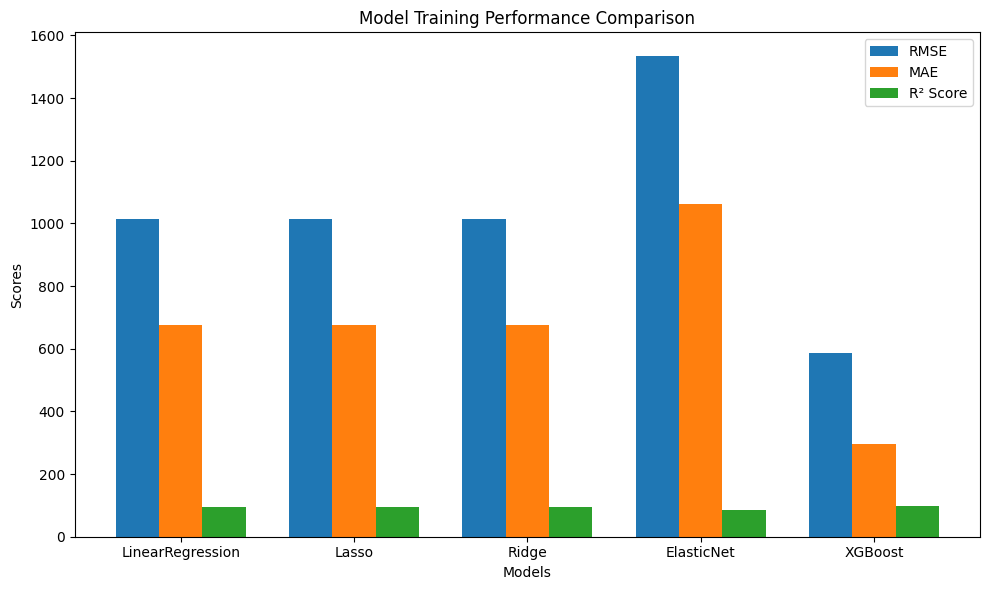

In [43]:

# Model names
models = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'XGBoost']

# Performance metrics
rmse = [1014.63, 1014.66, 1014.63, 1533.36, 587.81]
mae = [675.08, 676.24, 675.11, 1060.95, 297.16]
r2 = [93.63, 93.63, 93.63, 85.45, 97.86]

# Set up bar width and positions
x = np.arange(len(models))
width = 0.25

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x - width, rmse, width, label='RMSE')
ax.bar(x, mae, width, label='MAE')
ax.bar(x + width, r2, width, label='R² Score')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Training Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

#  XGBoost clearly outperforms the others in all metrics.
